Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



[]

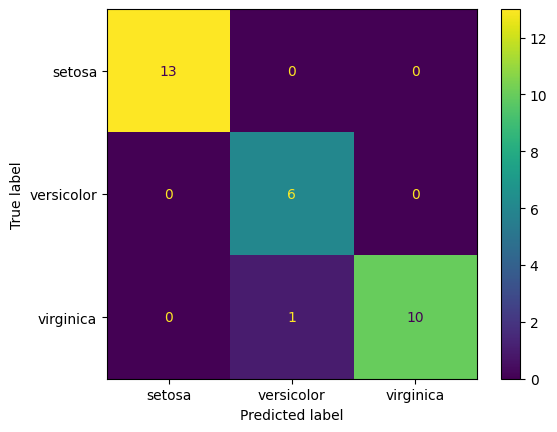

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = datasets.load_iris()

x, y = data.data, data.target

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=123
)

# Train Naive Bayes
NB = GaussianNB().fit(x_train, y_train)
pred = NB.predict(x_test)



# Print reports
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, pred),display_labels=iris.target_names)
disp.plot()
plt.plot()





 Accuracy      : 93.33 %
 Precision     : 93.33 %
 Recall        : 93.33 %
 F1 Score      : 93.33 %

 Correct Predictions : 28
 Wrong Predictions   : 2

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      0.88      0.88         8
   virginica       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



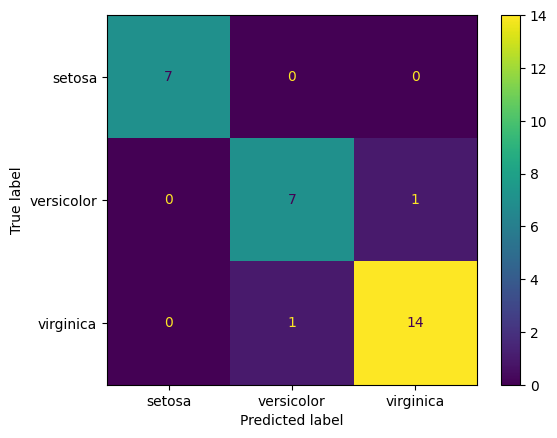

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
irisData = load_iris()
X = irisData.data
y = irisData.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=435)

# KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy and Scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

correct = sum(y_pred == y_test)
wrong = sum(y_pred != y_test)

# Print Results
print(f"\n Accuracy      : {round(accuracy * 100, 2)} %")
print(f" Precision     : {round(precision * 100, 2)} %")
print(f" Recall        : {round(recall * 100, 2)} %")
print(f" F1 Score      : {round(f1 * 100, 2)} %")

print(f"\n Correct Predictions : {correct}")
print(f" Wrong Predictions   : {wrong}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=irisData.target_names))


# Confusion Matrix using Seaborn
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=iris.target_names)
disp.plot()
plt.show()


In [8]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix.to_csv("iris_correlation.csv", index=True)
print("Correlation matrix saved to 'iris_correlation.csv'.")

# Print correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Calculate covariance matrix
covariance_matrix = df.cov()
covariance_matrix.to_csv("iris_covariance.csv", index=True)
print("Covariance matrix saved to 'iris_covariance.csv'.")

# Print covariance matrix
print("\nCovariance matrix:")
print(covariance_matrix)

Correlation matrix saved to 'iris_correlation.csv'.
Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
Covariance matrix saved to 'iris_covariance.csv'.

Covariance matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329

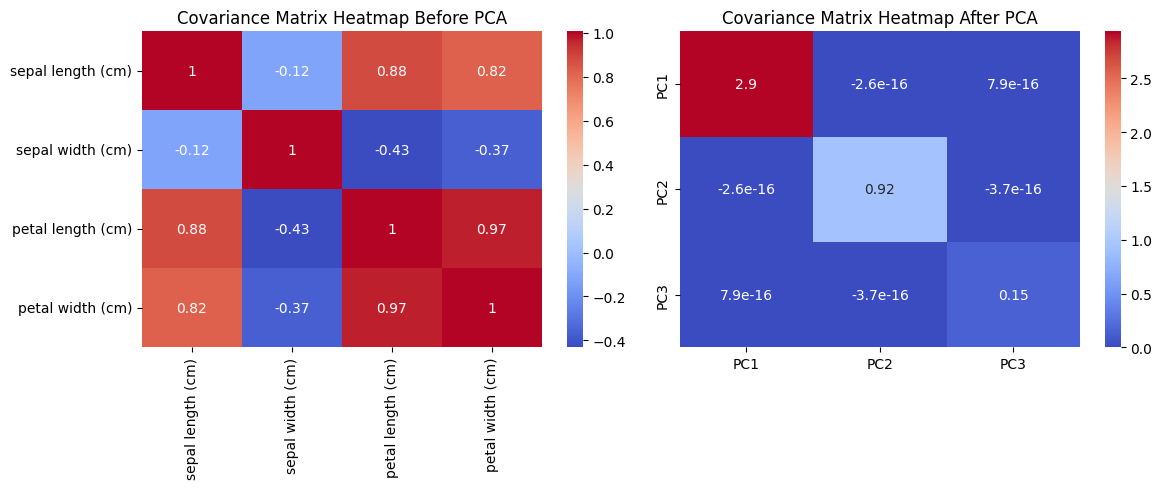

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.97928516357138


In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Iris dataset and convert into DataFrame
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Covariance matrix before PCA
cov_before = np.cov(X_scaled.T)
 
# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Covariance matrix after PCA
cov_after = np.cov(X_pca.T)

# Plot heatmap of covariance matrix before PCA
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(cov_before, annot=True, cmap='coolwarm', 
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Covariance Matrix Heatmap Before PCA')

# Plot heatmap of covariance matrix after PCA
plt.subplot(1, 2, 2)
sns.heatmap(cov_after, annot=True, cmap='coolwarm',
            xticklabels=[f'PC{i+1}' for i in range(cov_after.shape[0])],
            yticklabels=[f'PC{i+1}' for i in range(cov_after.shape[0])])
plt.title('Covariance Matrix Heatmap After PCA')

plt.tight_layout()
plt.show()

# Print variance before and after PCA
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))

Accuracy: 94.15%
Precision: 96.2264%
Recall: 94.4444%
[[ 59   4]
 [  6 102]]


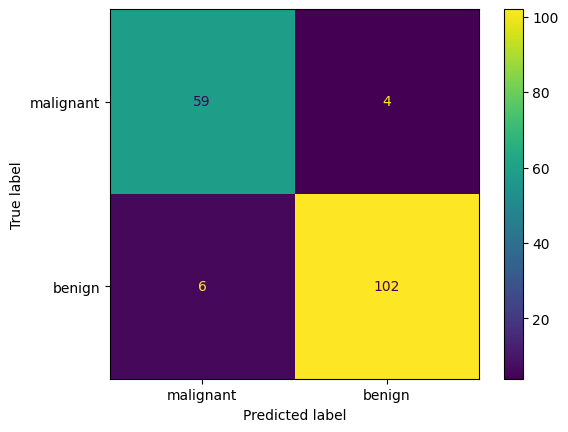

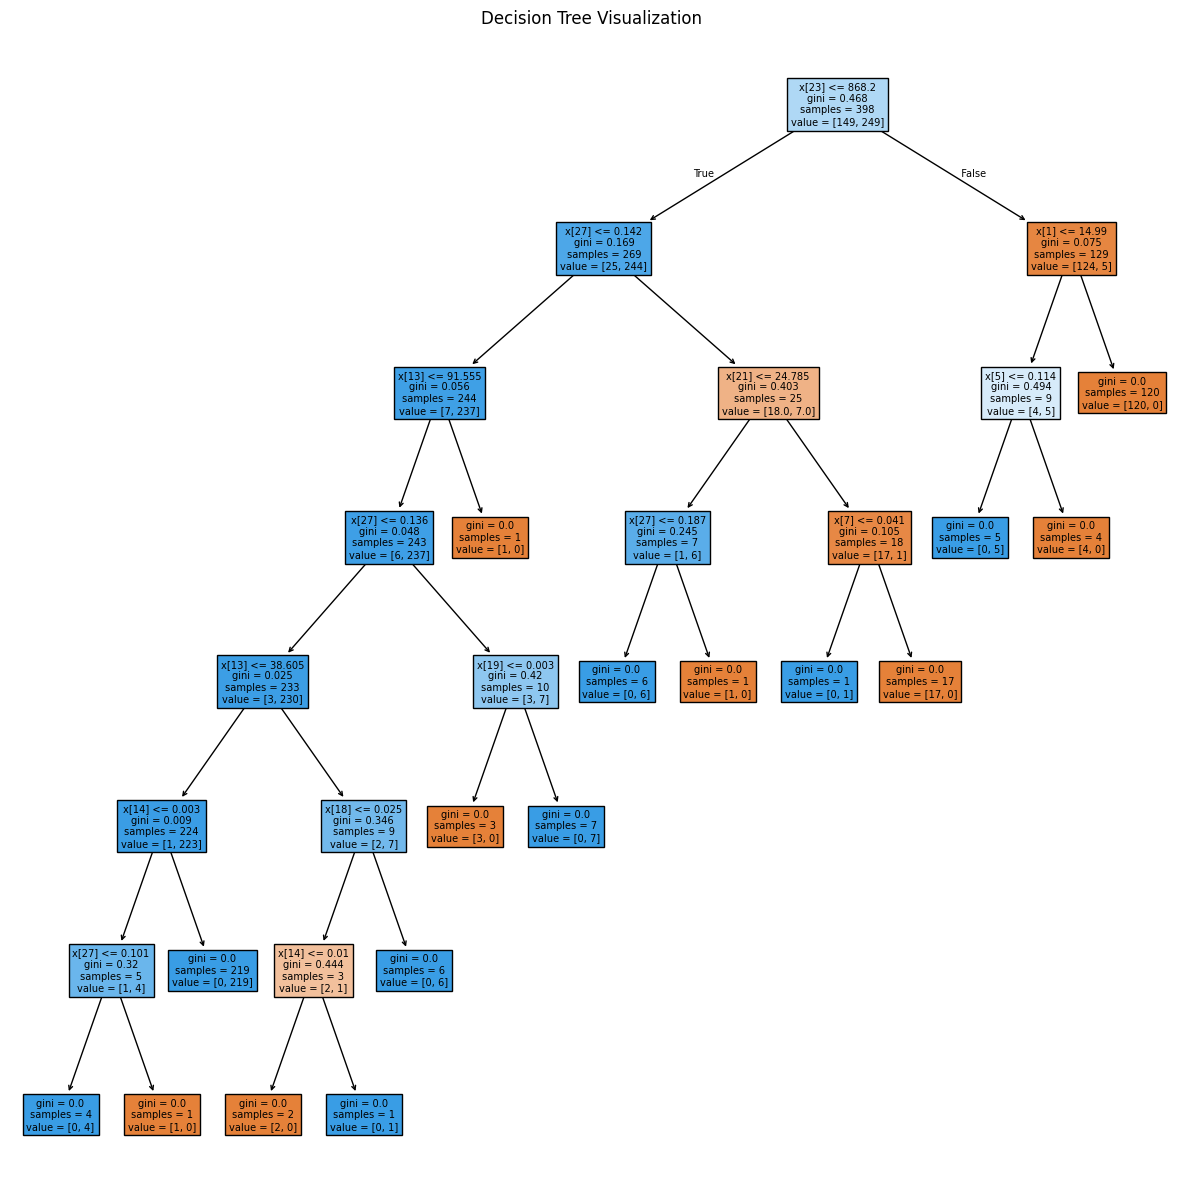

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=432)

# Train decision tree
Dtree = tree.DecisionTreeClassifier().fit(X_train, y_train)
pred = Dtree.predict(X_test)

# Metrics with correct argument order
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {round(acc*100, 2)}%")

prec = precision_score(y_test, pred)
print(f"Precision: {round(prec*100, 4)}%")

rc = recall_score(y_test, pred)
print(f"Recall: {round(rc*100, 4)}%")

# Confusion matrix and display with correct class labels
cm = confusion_matrix(y_test, pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.show()

# Decision tree visualization
plt.figure(figsize=(15, 15))
tree.plot_tree(Dtree, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


cove berofre:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
cov_after :
 [[ 2.93808505e+00 -2.61256407e-16  7.87595959e-16]
 [-2.61256407e-16  9.20164904e-01 -3.70454395e-16]
 [ 7.87595959e-16 -3.70454395e-16  1.47741821e-01]]


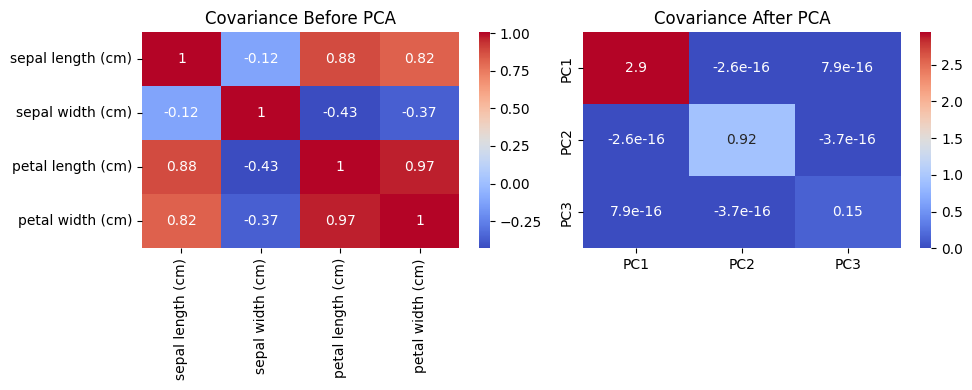

Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.97928516357138


In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset and prepare DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
 
# Compute covariance matrix before PCA
cov_before = np.cov(X_scaled.T)
print("cove berofre:\n",cov_before)

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Compute covariance matrix after PCA
cov_after = np.cov(X_pca.T)
print("cov_after :\n",cov_after)

# Simplified plotting of covariance heatmaps
plt.figure(figsize=(10, 4))
for i, (cov, title, labels) in enumerate([
    (cov_before, 'Covariance Before PCA', iris.feature_names),
    (cov_after, 'Covariance After PCA', [f'PC{i+1}' for i in range(3)])
]):
    plt.subplot(1, 2, i+1)
    sns.heatmap(cov, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
    plt.title(title)
plt.tight_layout()
plt.show()

# Print total variances
print("Total variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))


0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


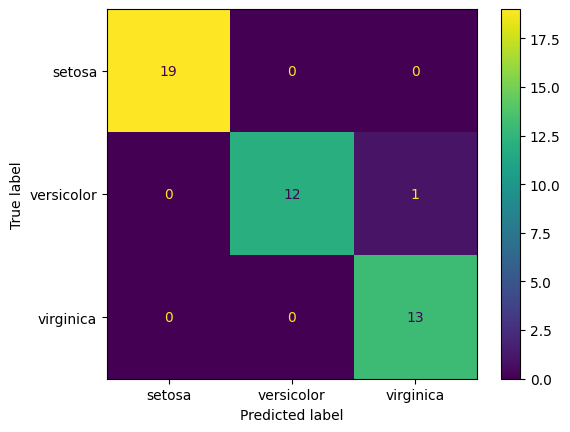

In [12]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
iris=load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=SVC(kernel='rbf',C=0.1).fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
cm=confusion_matrix(y_test,pred)
print(cm)
disp=ConfusionMatrixDisplay(cm,display_labels=iris.target_names)
disp.plot()
plt.show()

accuracy : 100.0%
precision : 100.0%
1.0
1.0
[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]


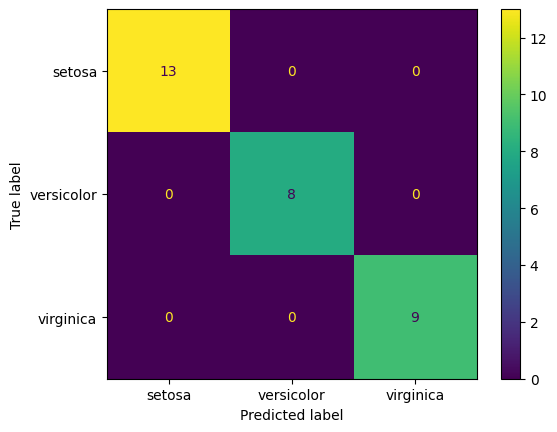

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,ConfusionMatrixDisplay    )
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
irisData = load_iris()
X = irisData.data
y = irisData.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# KNN with k=3

model=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train

# Predictions
y_pred = knn.predict(X_test)

# Accuracy and Scores
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy : {round(accuracy*100,2)}%")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"precision : {round(precision*100,2)}%")
recall = recall_score(y_test, y_pred, average='weighted')
print(recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)
cm=confusion_matrix(y_test,y_pred)
print(cm)
disp=ConfusionMatrixDisplay(cm,display_labels=iris.target_names)
disp.plot()
plt.show()

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
import numpy as np
iris=load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=412)
model=LogisticRegression().fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred) 
print(f"The accuracy is {round(acc*100,2)}%")
prec=precision_score(y_test,pred,average='weighted')
print(f"the precision is {round(prec*100,2)}%")
imp=np.mean(np.abs(model.coef_),axis=0)
for feature_name,importance_value in zip(iris.feature_names,imp):
    print(f"{feature_name}:{importance_value}")

The accuracy is 93.33%
the precision is 93.32%
sepal length (cm):0.3214286457006776
sepal width (cm):0.542530239576188
petal length (cm):1.639203273192204
petal width (cm):1.1684463147679345


The accuracy is 93.33%
The precision is 93.32%
sepal length (cm): 0.3214286457006776
sepal width (cm): 0.542530239576188
petal length (cm): 1.639203273192204
petal width (cm): 1.1684463147679345


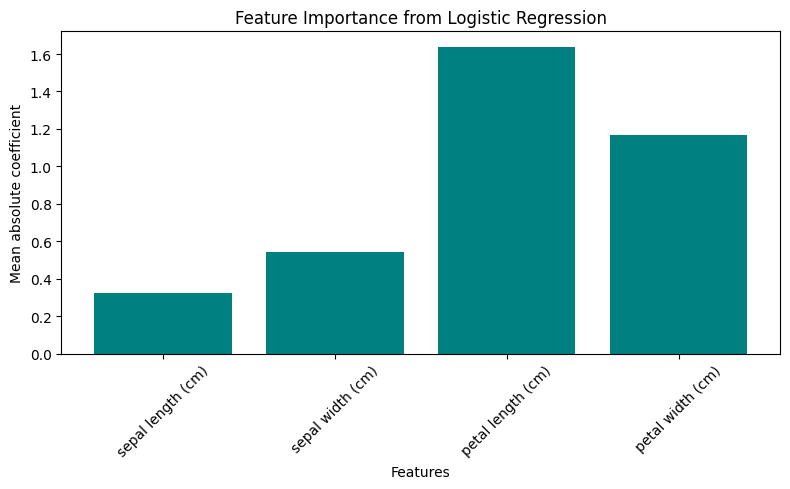

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=412)

model = LogisticRegression(max_iter=200).fit(x_train, y_train)
pred = model.predict(x_test)

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred, average='weighted')

print(f"The accuracy is {round(acc * 100, 2)}%")
print(f"The precision is {round(prec * 100, 2)}%")

imp = np.mean(np.abs(model.coef_), axis=0)
for feature_name, importance_value in zip(iris.feature_names, imp):
    print(f"{feature_name}: {importance_value}")

plt.figure(figsize=(8, 5))
plt.bar(iris.feature_names, imp, color='teal')
plt.xlabel('Features')
plt.ylabel('Mean absolute coefficient')
plt.title('Feature Importance from Logistic Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
